# Proyecto Clasificación - Detección de Spam



### Alejandro Fernández Barrionuevo
### Tristán Del Rosal Aguirre

# 1. Obtención de los datos

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Para poder cargar el dataset desde drive sin montarlo para poder hacer el archivo exportable sin descargar el dataset de forma local
import gdown

download_url = 'https://drive.google.com/uc?id=1U2NZLm_tKjY-xTkVBIkBtcaYbb619MHs'
# Descarga el archivo
gdown.download(download_url, 'spam_dataset.csv', quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1U2NZLm_tKjY-xTkVBIkBtcaYbb619MHs
From (redirected): https://drive.google.com/uc?id=1U2NZLm_tKjY-xTkVBIkBtcaYbb619MHs&confirm=t&uuid=8e044ab8-8853-4db9-af2a-c0da51ac7f29
To: /content/spam_dataset.csv
100%|██████████| 358M/358M [00:03<00:00, 89.9MB/s]


'spam_dataset.csv'

In [ ]:
df_spam = pd.read_csv('spam_dataset.csv')

# 2. Descripción de los datos

In [ ]:
df_spam.head()

,label,text
0,Spam,viiiiiiagraaaa\nonly for the ones that want to...
1,Ham,got ice thought look az original message ice o...
2,Spam,yo ur wom an ne eds an escapenumber in ch ma n...
3,Spam,start increasing your odds of success & live s...
4,Ham,author jra date escapenumber escapenumber esca...


In [ ]:
df_spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193852 entries, 0 to 193851
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   label   193852 non-null  object
 1   text    193850 non-null  object
dtypes: object(2)
memory usage: 3.0+ MB


In [ ]:
df_spam.describe()

,label,text
count,193852,193850
unique,2,193848
top,Ham,unsubscribe
freq,102160,2


In [ ]:
# Valores nulos
df_spam.isnull().sum()

,0
label,0
text,2


In [ ]:
df_spam['label'].value_counts()

,count
label,
Ham,102160
Spam,91692


# 3. Exploración y visualización de los datos

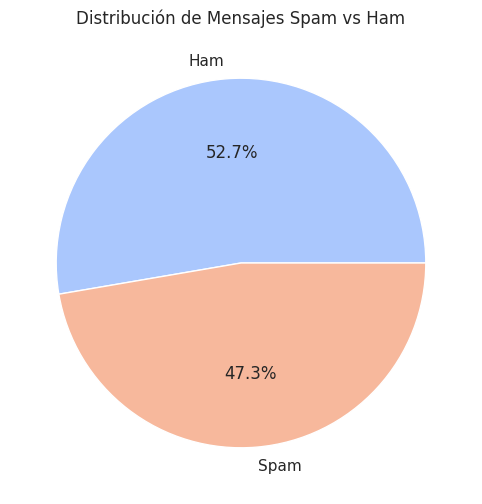

In [ ]:
# Visualización de la distribución de las etiquetas
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

# Obtener el conteo de spam y ham
label_counts = df_spam['label'].value_counts()

# Definir los colores usando la paleta de colores de Seaborn
colors = sns.color_palette('coolwarm', n_colors=len(label_counts))

# Crear el gráfico de pastel usando matplotlib.pyplot.pie y pasar el argumento de colores
plt.pie(label_counts, labels=label_counts.index, colors=colors, autopct='%1.1f%%')
plt.title("Distribución de Mensajes Spam vs Ham")
plt.show()

In [ ]:
import re

def clean_text(text):
    if isinstance(text, str):
        # Expresión regular para limpiar palabras que ensucian la base de datos
        patterns = [r'escapenumber', r'escapelong', r'cescapenumber', r'bescapenumber', r'\b[a-z]?escapenumber\b']
        # Combina los patrones en una sola expresión regular
        combined_pattern = re.compile('|'.join(patterns))
        # Reemplaza los patrones coincidentes con una cadena vacía
        cleaned_text = combined_pattern.sub('', text)
        return cleaned_text
    else:
        return text

df_spam['text'] = df_spam['text'].apply(clean_text)

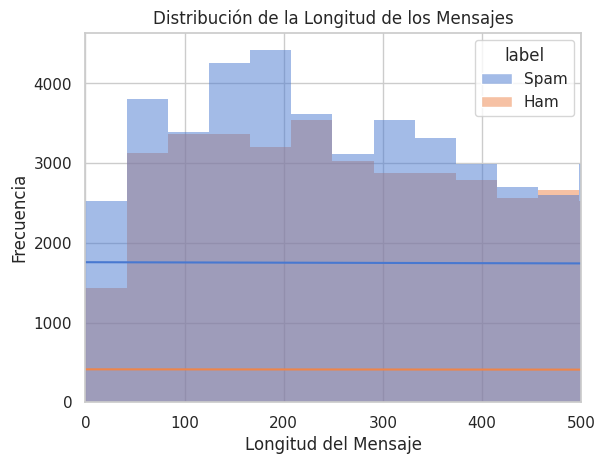

In [ ]:
textlen = df_spam['text'].astype(str).apply(len)

# Visualización de la distribución de la longitud de los mensajes
sns.histplot(data=df_spam, x=textlen, hue='label', kde=True, palette='muted')
plt.title('Distribución de la Longitud de los Mensajes')
plt.xlabel('Longitud del Mensaje')
plt.ylabel('Frecuencia')
plt.xlim(0, 500)
plt.show()

In [ ]:
df_spam['message_length'] = df_spam['text'].astype(str).apply(len)
df_spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193852 entries, 0 to 193851
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   label           193852 non-null  object
 1   text            193850 non-null  object
 2   message_length  193852 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 4.4+ MB


# 4. Exposición del objetivo

Construir un modelo de machine learning capaz de clasificar mensajes email como spam o ham basado en el contenido del texto.

# 5. Preparación de los datos

In [ ]:
df_spam['text'] = df_spam['text'].str.lower()

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    if isinstance(text, str):
        tokens = word_tokenize(text)
        tokens = [word for word in tokens if word.isalnum()]
        tokens = [word for word in tokens if word not in stop_words]
        return ' '.join(tokens)
    else:

        return ''

df_spam['text'] = df_spam['text'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


### Palabras mas usadas en spam y ham

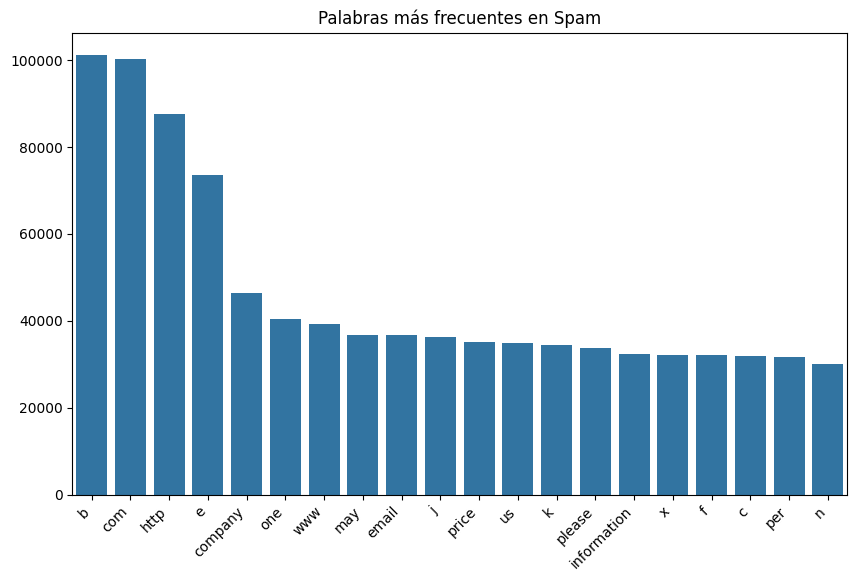

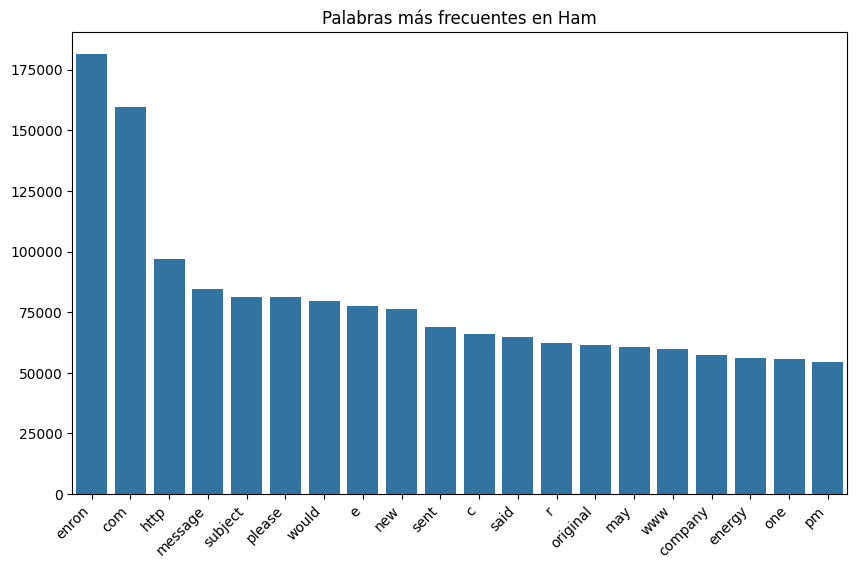

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Obtener las palabras más frecuentes en spam y ham
spam_words = ' '.join(df_spam[df_spam['label'] == 'Spam']['text']).split()
ham_words = ' '.join(df_spam[df_spam['label'] == 'Ham']['text']).split()

# Filtrar palabras no deseadas en las frecuencias
spam_freq = Counter([word for word in spam_words if word not in ['escapenumber', 'escapelong', 'cescapenumber', 'bescapenumber']]).most_common(20)
ham_freq = Counter([word for word in ham_words if word not in ['escapenumber', 'escapelong', 'cescapenumber', 'bescapenumber']]).most_common(20)

# Crea el gráfico de barras para spam
plt.figure(figsize=(10, 6))
sns.barplot(x=[word[0] for word in spam_freq], y=[word[1] for word in spam_freq])
plt.title('Palabras más frecuentes en Spam')
plt.xticks(rotation=45, ha='right')
plt.show()

# Crea el gráfico de barras para ham
plt.figure(figsize=(10, 6))
sns.barplot(x=[word[0] for word in ham_freq], y=[word[1] for word in ham_freq])
plt.title('Palabras más frecuentes en Ham')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df_spam['text'])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, df_spam['label'], test_size=0.2, random_state=42)

# 6. Entrenamiento del modelo

In [ ]:
# Diccionario para almacenar los resultados
model_results = {}

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score

# Entrenamiento del modelo Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Predicciones y métricas
y_pred_nb = nb_model.predict(X_test)
model_results['Naive Bayes'] = {
    "Accuracy": accuracy_score(y_test, y_pred_nb),
    "F1-Score": f1_score(y_test, y_pred_nb, pos_label='Spam')  # Ajusta la clase positiva si es necesario
}

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Entrenamiento del modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

# Predicciones y métricas
y_pred_rf = rf_model.predict(X_test)
model_results['Random Forest'] = {
    "Accuracy": accuracy_score(y_test, y_pred_rf),
    "F1-Score": f1_score(y_test, y_pred_rf, pos_label='Spam')
}

In [ ]:
from sklearn.svm import LinearSVC

# Entrenamiento del modelo SVM
svm_model = LinearSVC(C=0.1, max_iter=1000, random_state=42)
svm_model.fit(X_train, y_train)

# Predicciones y métricas
y_pred_svm = svm_model.predict(X_test)
model_results['SVM'] = {
    "Accuracy": accuracy_score(y_test, y_pred_svm),
    "F1-Score": f1_score(y_test, y_pred_svm, pos_label='Spam')
}

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
# Entrenamiento del modelo AdaBoost
ada_model = AdaBoostClassifier(n_estimators=25, learning_rate=0.75, random_state=42, algorithm="SAMME")
ada_model.fit(X_train, y_train)

# Predicciones y métricas
y_pred_ada = ada_model.predict(X_test)
model_results['AdaBoost'] = {
    "Accuracy": accuracy_score(y_test, y_pred_ada),
    "F1-Score": f1_score(y_test, y_pred_ada, pos_label='Spam')
}

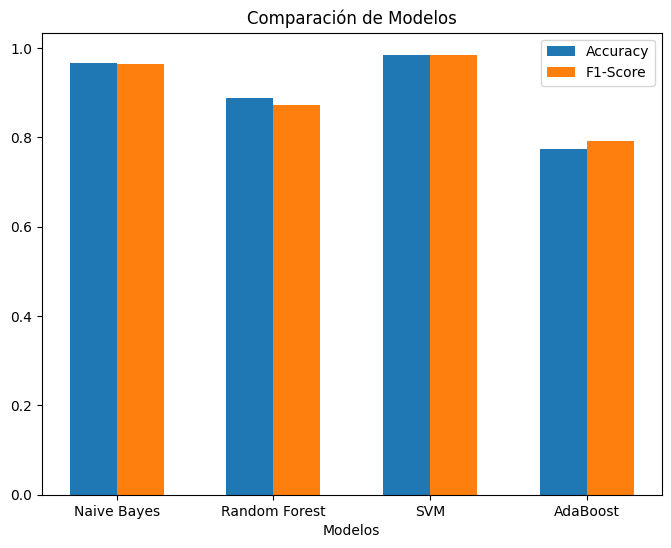

In [ ]:
# Extraer métricas
metrics = list(model_results.values())[0].keys()  # Métricas disponibles
models = list(model_results.keys())  # Nombres de modelos
x = np.arange(len(models))  # Posiciones en el eje x
width = 0.3  # Ancho de las barras

# Crear gráfico
fig, ax = plt.subplots(figsize=(8, 6))
for i, metric in enumerate(metrics):
    values = [model_results[model][metric] for model in models]
    ax.bar(x + i * width, values, width, label=metric)

ax.set_xlabel('Modelos')
ax.set_title('Comparación de Modelos')
ax.set_xticks(x + width / len(metrics))
ax.set_xticklabels(models)
ax.legend()
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print("Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb, target_names=['Ham', 'Spam']))

Naive Bayes Classification Report:
              precision    recall  f1-score   support

         Ham       0.96      0.98      0.97     20467
        Spam       0.98      0.95      0.96     18304

    accuracy                           0.97     38771
   macro avg       0.97      0.97      0.97     38771
weighted avg       0.97      0.97      0.97     38771



In [ ]:
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf, target_names=['Ham', 'Spam']))

Random Forest Classification Report:
              precision    recall  f1-score   support

         Ham       0.86      0.95      0.90     20467
        Spam       0.93      0.82      0.87     18304

    accuracy                           0.89     38771
   macro avg       0.89      0.88      0.89     38771
weighted avg       0.89      0.89      0.89     38771



In [ ]:
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm, target_names=['Ham', 'Spam']))

SVM Classification Report:
              precision    recall  f1-score   support

         Ham       0.99      0.98      0.99     20467
        Spam       0.98      0.99      0.98     18304

    accuracy                           0.99     38771
   macro avg       0.98      0.99      0.99     38771
weighted avg       0.99      0.99      0.99     38771



In [ ]:
print("AdaBoost Classification Report:")
print(classification_report(y_test, y_pred_ada, target_names=['Ham', 'Spam']))

AdaBoost Classification Report:
              precision    recall  f1-score   support

         Ham       0.89      0.65      0.75     20467
        Spam       0.70      0.91      0.79     18304

    accuracy                           0.77     38771
   macro avg       0.80      0.78      0.77     38771
weighted avg       0.80      0.77      0.77     38771



In [ ]:
from sklearn.metrics import confusion_matrix

# Crear la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_nb, labels=['Ham', 'Spam'])

# Mostrar la matriz de confusión
print("Confusion Matrix for Naive Bayes:")
print(conf_matrix)

# Mostrar los valores por separado
tn, fp, fn, tp = conf_matrix.ravel()
print(f"True Negatives (Ham correctly classified): {tn}")
print(f"False Positives (Ham misclassified as Spam): {fp}")
print(f"False Negatives (Spam misclassified as Ham): {fn}")
print(f"True Positives (Spam correctly classified): {tp}")

Confusion Matrix for Naive Bayes:
[[20055   412]
 [  884 17420]]
True Negatives (Ham correctly classified): 20055
False Positives (Ham misclassified as Spam): 412
False Negatives (Spam misclassified as Ham): 884
True Positives (Spam correctly classified): 17420


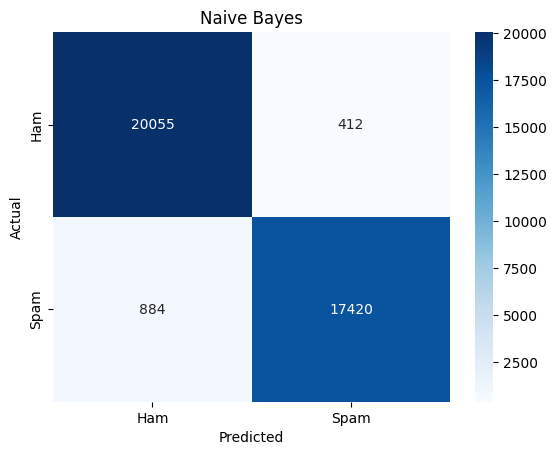

In [ ]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Naive Bayes')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

# Crear la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_rf, labels=['Ham', 'Spam'])

# Mostrar la matriz de confusión
print("Confusion Matrix for Random Forest:")
print(conf_matrix)

# Mostrar los valores por separado
tn, fp, fn, tp = conf_matrix.ravel()
print(f"True Negatives (Ham correctly classified): {tn}")
print(f"False Positives (Ham misclassified as Spam): {fp}")
print(f"False Negatives (Spam misclassified as Ham): {fn}")
print(f"True Positives (Spam correctly classified): {tp}")

Confusion Matrix for Random Forest:
[[19372  1095]
 [ 3268 15036]]
True Negatives (Ham correctly classified): 19372
False Positives (Ham misclassified as Spam): 1095
False Negatives (Spam misclassified as Ham): 3268
True Positives (Spam correctly classified): 15036


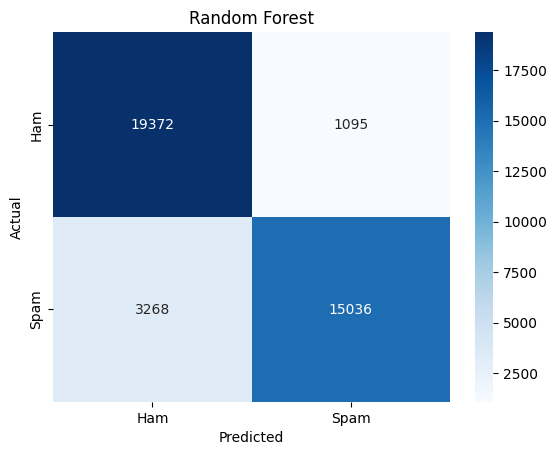

In [ ]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

# Crear la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_svm, labels=['Ham', 'Spam'])

# Mostrar la matriz de confusión
print("Confusion Matrix for SVM:")
print(conf_matrix)

# Mostrar los valores por separado
tn, fp, fn, tp = conf_matrix.ravel()
print(f"True Negatives (Ham correctly classified): {tn}")
print(f"False Positives (Ham misclassified as Spam): {fp}")
print(f"False Negatives (Spam misclassified as Ham): {fn}")
print(f"True Positives (Spam correctly classified): {tp}")

Confusion Matrix for SVM:
[[20126   341]
 [  238 18066]]
True Negatives (Ham correctly classified): 20126
False Positives (Ham misclassified as Spam): 341
False Negatives (Spam misclassified as Ham): 238
True Positives (Spam correctly classified): 18066


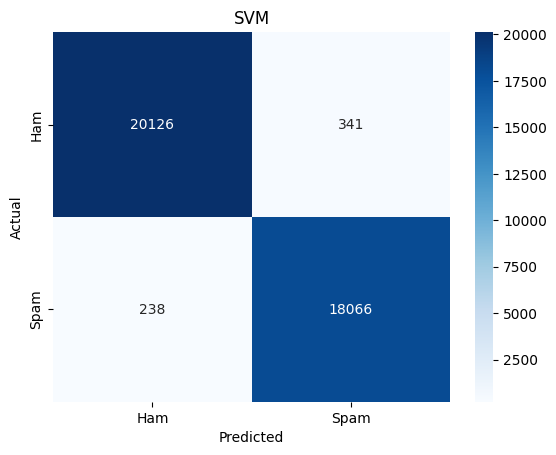

In [ ]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM')
plt.show()

In [ ]:
# Crear la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_ada, labels=['Ham', 'Spam'])

# Mostrar la matriz de confusión
print("Confusion Matrix for AdaBoost:")
print(conf_matrix)
# Mostrar los valores por separado
tn, fp, fn, tp = conf_matrix.ravel()
print(f"True Negatives (Ham correctly classified): {tn}")
print(f"False Positives (Ham misclassified as Spam): {fp}")
print(f"False Negatives (Spam misclassified as Ham): {fn}")
print(f"True Positives (Spam correctly classified): {tp}")

Confusion Matrix for AdaBoost:
[[13296  7171]
 [ 1607 16697]]
True Negatives (Ham correctly classified): 13296
False Positives (Ham misclassified as Spam): 7171
False Negatives (Spam misclassified as Ham): 1607
True Positives (Spam correctly classified): 16697


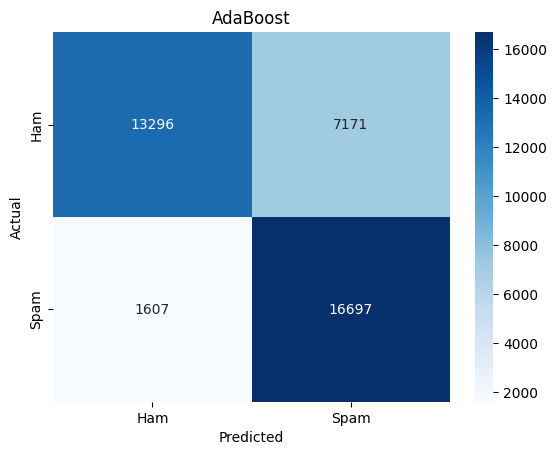

In [ ]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('AdaBoost')
plt.show()